# Họ và tên: Trần Thuận Phát
# MSSV: 21127666

In [1]:
import numpy as np
import random
import pandas as pd 
from keras.datasets import mnist, fashion_mnist    
from keras import utils  
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load Data MNIST

In [2]:
(X_MNIST_train, y_MNIST_train), (X_MNIST_test, y_MNIST_test) = mnist.load_data()

print("X_train shape", X_MNIST_train.shape)
print("y_train shape", y_MNIST_train.shape)
print("X_test shape", X_MNIST_test.shape)
print("y_test shape", y_MNIST_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


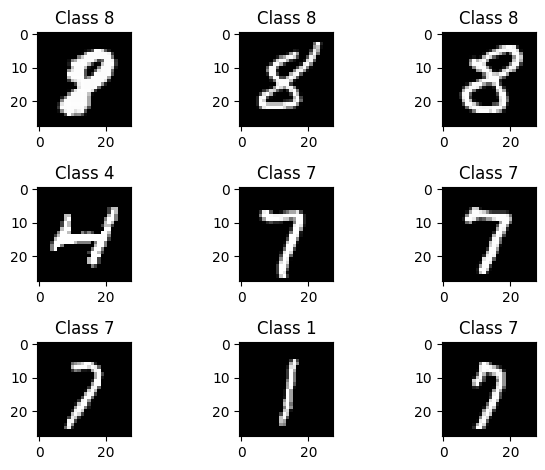

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_MNIST_train))
    plt.imshow(X_MNIST_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_MNIST_train[num]))
    
plt.tight_layout()

# DATA PROCESSING OF MNIST

In [3]:
X_MNIST_train = X_MNIST_train.reshape(60000, 784) 
X_MNIST_test = X_MNIST_test.reshape(10000, 784)   

X_MNIST_train = X_MNIST_train.astype('float32')   
X_MNIST_test = X_MNIST_test.astype('float32')

X_MNIST_train /= 255                        
X_MNIST_test /= 255

print("Training matrix shape", X_MNIST_train.shape)
print("Testing matrix shape", X_MNIST_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# Convert to one-hot encoding for MNIST DATASET

In [4]:
no_classes = 10

Y_MNIST_train = utils.to_categorical(y_MNIST_train, no_classes)
Y_MNIST_test = utils.to_categorical(y_MNIST_test, no_classes)

# Plot Digits OF MNIST

In [6]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Digit:{np.argmax(Y[i])}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

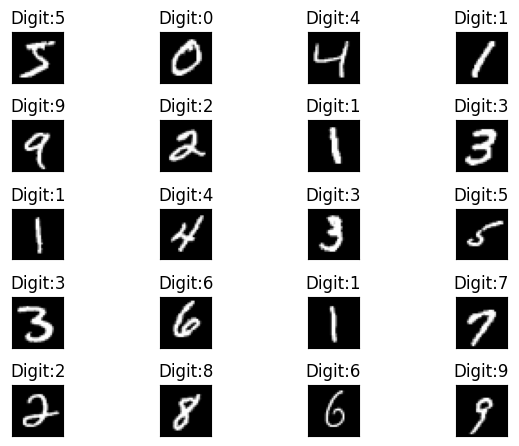

In [7]:
plot_digits(X_MNIST_train, Y_MNIST_train)

# Lenet5 Model

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

# TRAIN DATASET OF MNIST

In [16]:
history_model = model.fit(X_MNIST_train.reshape(X_MNIST_train.shape[0], 28, 28, 1), Y_MNIST_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_MNIST_test.reshape(X_MNIST_test.shape[0], 28, 28, 1), Y_MNIST_test))

Epoch 1/10
469/469 [==============================] - 41s 87ms/step - loss: 0.2300 - accuracy: 0.9434 - val_loss: 0.0480 - val_accuracy: 0.9839
Epoch 2/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0367 - val_accuracy: 0.9881
Epoch 3/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 4/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0343 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 7/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0.0380 - val_accuracy:

# LOAD DATA OF MNIST FASHION

In [7]:
(X_MNIST_FASHION_train, y_MNIST_FASHION_train), (X_MNIST_FASHION_test, y_MNIST_FASHION_test) = fashion_mnist.load_data()

print("X_train shape", X_MNIST_FASHION_train.shape)
print("y_train shape", y_MNIST_FASHION_train.shape)
print("X_test shape", X_MNIST_FASHION_test.shape)
print("y_test shape", y_MNIST_FASHION_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_MNIST_FASHION_train))
    plt.imshow(X_MNIST_FASHION_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_MNIST_FASHION_train[num]))
    
plt.tight_layout()

# DATA PROCESSING OF MNIST FASHION

In [8]:
X_MNIST_FASHION_train = X_MNIST_FASHION_train.reshape(60000, 784) 
X_MNIST_FASHION_test = X_MNIST_FASHION_test.reshape(10000, 784)   

X_MNIST_FASHION_train = X_MNIST_FASHION_train.astype('float32')   
X_MNIST_FASHION_test = X_MNIST_FASHION_test.astype('float32')

X_MNIST_FASHION_train /= 255                        
X_MNIST_FASHION_test /= 255

print("Training matrix shape", X_MNIST_FASHION_train.shape)
print("Testing matrix shape", X_MNIST_FASHION_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# Convert to one-hot encoding FOR MNIST FASHION DATASET

In [9]:
no_classes = 10

Y_MNIST_FASHION_train = utils.to_categorical(y_MNIST_FASHION_train, no_classes)
Y_MNIST_FASHION_test = utils.to_categorical(y_MNIST_FASHION_test, no_classes)

# Plot Digits OF MNIST FASHION

In [ ]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Digit:{np.argmax(Y[i])}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [ ]:
plot_digits(X_MNIST_FASHION_train, Y_MNIST_FASHION_train)

# TRAIN DATASET OF MNIST FASHION

In [13]:
history_model = model.fit(X_MNIST_FASHION_train.reshape(X_MNIST_FASHION_train.shape[0], 28, 28, 1), Y_MNIST_FASHION_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_MNIST_FASHION_test.reshape(X_MNIST_FASHION_test.shape[0], 28, 28, 1), Y_MNIST_FASHION_test))

Epoch 1/10
469/469 [==============================] - 43s 89ms/step - loss: 0.5190 - accuracy: 0.8121 - val_loss: 0.3739 - val_accuracy: 0.8653
Epoch 2/10
469/469 [==============================] - 40s 86ms/step - loss: 0.3221 - accuracy: 0.8834 - val_loss: 0.3269 - val_accuracy: 0.8816
Epoch 3/10
469/469 [==============================] - 40s 85ms/step - loss: 0.2744 - accuracy: 0.9010 - val_loss: 0.2946 - val_accuracy: 0.8924
Epoch 4/10
469/469 [==============================] - 38s 82ms/step - loss: 0.2428 - accuracy: 0.9112 - val_loss: 0.2716 - val_accuracy: 0.9006
Epoch 5/10
469/469 [==============================] - 39s 82ms/step - loss: 0.2184 - accuracy: 0.9193 - val_loss: 0.2598 - val_accuracy: 0.9066
Epoch 6/10
469/469 [==============================] - 41s 88ms/step - loss: 0.1980 - accuracy: 0.9265 - val_loss: 0.2517 - val_accuracy: 0.9126
Epoch 7/10
469/469 [==============================] - 41s 88ms/step - loss: 0.1812 - accuracy: 0.9323 - val_loss: 0.2499 - val_accuracy:

# EVALUATE ACCURACY AND LOSS OF MNIST DATASET

In [17]:
score = model.evaluate(X_MNIST_test.reshape(X_MNIST_test.shape[0], 28, 28, 1), Y_MNIST_test, batch_size=32)
print(f"Accuracy: {score[1]}")
print(f"Loss: {score[0]}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0326 - accuracy: 0.9898
Accuracy: 0.989799976348877
Loss: 0.03256073221564293


# EVALUATE ACCURACY AND LOSS OF MNIST FASHION DATASET

In [18]:
score = model.evaluate(X_MNIST_FASHION_test.reshape(X_MNIST_FASHION_test.shape[0], 28, 28, 1), Y_MNIST_FASHION_test, batch_size=32)
print(f"Accuracy: {score[1]}")
print(f"Loss: {score[0]}")

313/313 [==============================] - 3s 9ms/step - loss: 4.3214 - accuracy: 0.1795
Accuracy: 0.17949999868869781
Loss: 4.3214240074157715
